# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os

#### Merge sales data into single CSV file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

all_data.to_csv("2019_sales_data.csv", index=False)

#### Read updated dataframe

In [3]:
sales_data = pd.read_csv("2019_sales_data.csv") 
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean the data

##### Drop NANs

In [4]:
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df.head()

sales_data = sales_data.dropna(how='all')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Delete duplicated Column Headers

In [5]:
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']

##### Convert columns to correct type

In [6]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered']) #Make int
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Augment data

In [7]:
# Add Month column

sales_data['Month'] = sales_data['Order Date'].str[0:2]
sales_data['Month'] = sales_data['Month'].astype('int32')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
# Add a Sales Column to aggregate price and quantity data

sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [9]:
# Add a City column

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 

#### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
results = sales_data.groupby('Month').sum()

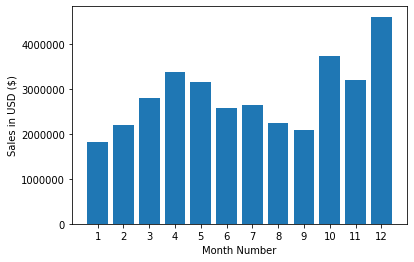

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Question 2: Which city had the most sales?

In [12]:
results = sales_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


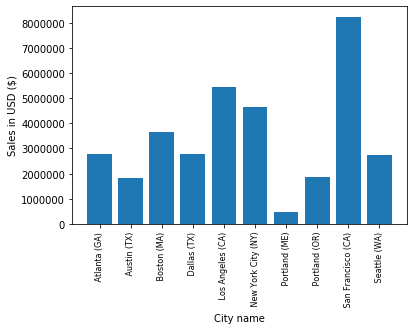

In [13]:
cities = [city for city, df in sales_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Question 3: What is the optimal time for advertisements so as to maximize sales potential? 

In [14]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [15]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['Minute'] = sales_data['Order Date'].dt.minute

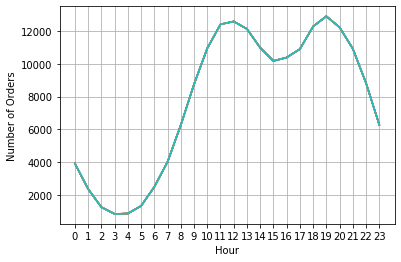

In [16]:
hours = [hour for hour, df in sales_data.groupby('Hour')]

plt.plot(hours, sales_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# The hours between 11:00-13:00 and and 18:00-20:00 are best suited for advertisement

#### Question 4: What products are most often sold together? 

In [17]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)] # Use duplicate order IDs to identify items ordered together

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()        

C:\Users\yashn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# References: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What is the best-selling product and why?

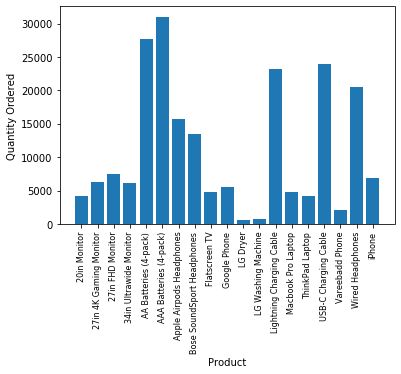

In [19]:
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

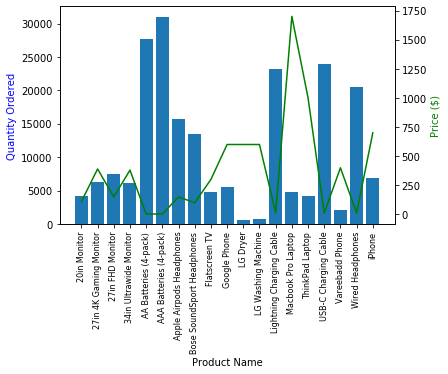

In [20]:
prices = sales_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'g-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

The above graph suggests an inverse correlation between price and demand i.e. the lowest priced utility items like batteries and charging cables are also the best-selling items. 